In [44]:
#Libraries
from numpy import loadtxt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import pandas as pd
import matplotlib.pyplot as plt
import csv
import copy
import math
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#Dataset loading and preprocessing
df = pd.read_csv('/content/drive/MyDrive/Gardient_descent_data/data.txt')
df.shape

(99, 3)

In [46]:
print(df.head())

   34.62365962451697  78.0246928153624  0
0          30.286711         43.894998  0
1          35.847409         72.902198  0
2          60.182599         86.308552  1
3          79.032736         75.344376  1
4          45.083277         56.316372  0


In [47]:
df.columns

Index(['34.62365962451697', '78.0246928153624', '0'], dtype='object')

In [48]:
df.dtypes

34.62365962451697    float64
78.0246928153624     float64
0                      int64
dtype: object

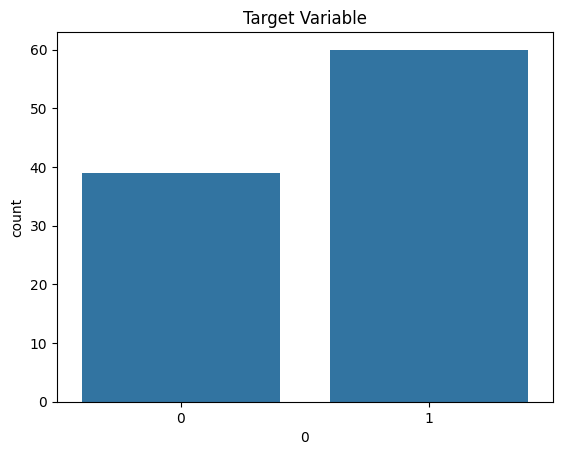

In [49]:
#Class Distribution
sns.countplot(x="0", data=df)
plt.title("Target Variable")
plt.show()

In [50]:
X=df[['34.62365962451697','78.0246928153624']]
y=df['0']

In [51]:
X.shape

(99, 2)

In [52]:
y.shape

(99,)

(99,)


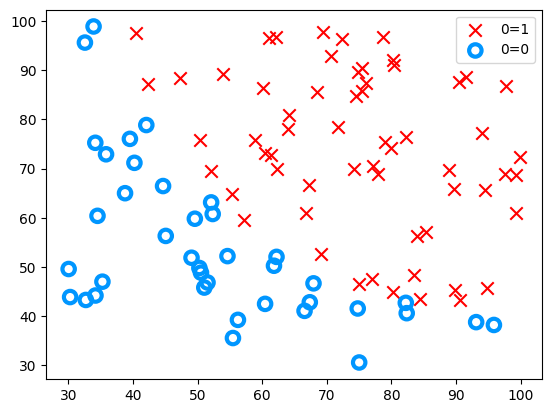

In [53]:
pos_label="0=1"
neg_label="0=0"
fig, ax = plt.subplots()

pos = y == 1
neg = y == 0
print(pos.shape)

# Plot examples
ax.scatter(X[pos].values[:, 0], X[pos].values[:, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X[neg].values[:, 0], X[neg].values[:, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [54]:
#Introduce Sigmoid function
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [55]:
#Compute cost logistic
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

In [56]:
#Convert datafream object to array
df=pd.DataFrame(X)
X_train=df.values

df=pd.DataFrame(y)
y_train=df.values

In [57]:
print(X_train.shape)

(99, 2)


In [58]:
y_array = y_train.reshape(-1)
print(y_array.shape)

(99,)


In [59]:
# Assuming you have 2 features
num_features = 2  #(99, 2)
w_tmp = np.zeros((num_features,))
b_tmp = -3
print(compute_cost_logistic(X_train,y_train, w_tmp, b_tmp))

[1.86676917]


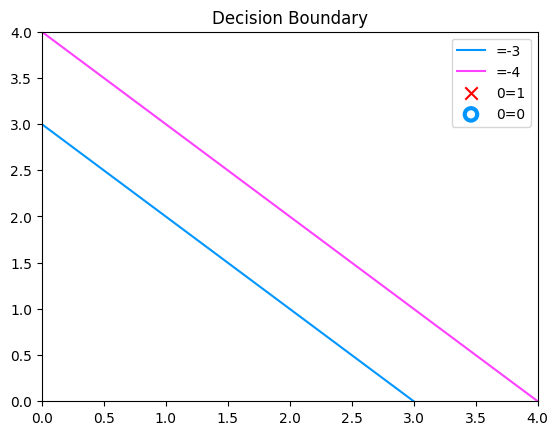

In [60]:
# Choose values between 0 and 6
x0 = np.arange(0,12)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0
fig,ax = plt.subplots()

# Plot the decision boundary
ax.plot(x0,x1, c='#0096ff', label="=-3")
ax.plot(x0,x1_other, c='#FF40FF', label="=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
ax.scatter(X[pos].values[:, 0], X[pos].values[:, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X[neg].values[:, 0], X[neg].values[:, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

ax.axis([0, 4, 0, 4])
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('', fontsize=20)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()




In [61]:
num_features = 2
w_array1 = np.zeros((num_features,))
# w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.zeros((num_features,))
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  [1.86676917]
Cost for b = -4 :  [2.44239235]


In [62]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # print(m,n)
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

In [63]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing

In [64]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.00001
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost [0.69028022]   
Iteration 1000: Cost [0.6268491]   
Iteration 2000: Cost [0.62665588]   
Iteration 3000: Cost [0.62657746]   
Iteration 4000: Cost [0.62652285]   
Iteration 5000: Cost [0.62647318]   
Iteration 6000: Cost [0.62642454]   
Iteration 7000: Cost [0.62637613]   
Iteration 8000: Cost [0.62632777]   
Iteration 9000: Cost [0.62627942]   

updated parameters: w:[0.00900105 0.00230211], b:[-0.00687456]


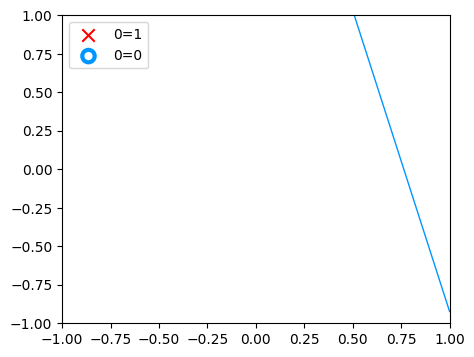

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# Plot the original data
ax.set_ylabel(r'')
ax.set_xlabel(r'')
ax.axis([-1, 1, -1, 1.0])

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c='red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best')

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

# Adjustable decision boundary coefficients
c0 = -w_out[0] / w_out[1]
c1 = -b_out / w_out[1]

# Plot the adjustable decision boundary
x0_vals = np.linspace(-1, 1, 100)
x1_vals = c0 * x0_vals + c1
ax.plot(x0_vals, x1_vals, c='#0096ff', lw=1)

plt.show()